In [1]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 1.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 742.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 852.1 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 318.9 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [5]:
# Specify the path to your Excel file
excel_file_path = 'CSI300.xlsx'

# Load the Excel file
excel_data = pd.ExcelFile(excel_file_path)

# Iterate through each sheet and save it as a CSV file
for sheet_name in excel_data.sheet_names:
    # Read the data from the current sheet
    df = pd.read_excel(excel_file_path, sheet_name=sheet_name)
    
    # Specify the CSV file path (you can customize the naming)
    csv_file_path = f'{sheet_name}.csv'
    
    # Save the current sheet as a CSV file
    df.to_csv(csv_file_path, index=False)

print("Conversion completed!")

Conversion completed!


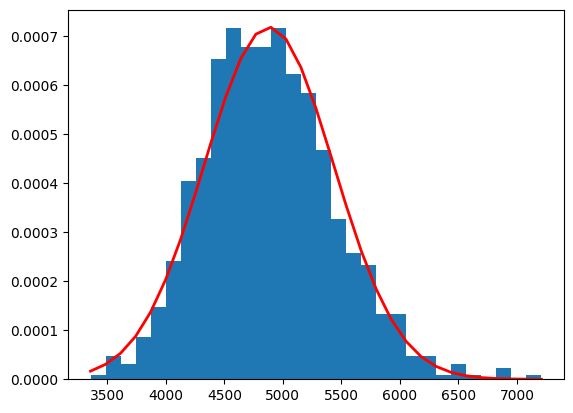

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
IF1_path = 'IF_1.csv'

# Read the CSV file
IF1 = pd.read_csv(IF1_path)

# Extract the specific columns
new_close_pl_rate = IF1['new_close_pl_rate']
new_settle_pl_rate = IF1['new_settle_pl_rate']
price = IF1['new_close']

# Display the columns

mu = new_close_pl_rate.mean()
sigma = new_close_pl_rate.std()


# Function to calculate the S array using GBM formula
def calculate_s_array(S_0, mu, sigma, t, num_steps=1000, num_simulations=100):
    s = np.zeros(num_steps)
    s[0] = S_0
    for i in range(1, num_steps):
        s_t = S_0
        for n in range(num_simulations):
            W_t = np.random.standard_normal()
            s_t *= np.exp((mu - 0.5 * sigma**2) * t + sigma * W_t)
        s[i] = s_t
    return s
  

# Example initial stock price
S_0 = price.iloc[0]
t = 1 / 100  # example time period

# Create a 2D array to store the s arrays for every price in the price array
num_prices = len(price)
s_2d_array = np.zeros((num_prices, 1000))

for i in range(num_prices):
    S_0 = price.iloc[i]
    s_2d_array[i] = calculate_s_array(S_0, mu, sigma, t)
   
# The price distribution of one option   
sigma_s = np.std(s_2d_array[0])
mu_s = np.mean(s_2d_array[0])


count, bins, ignored = plt.hist(s_2d_array[0], 30, density=True)
plt.plot(bins, 1/(sigma_s * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_s)**2 / (2 * sigma_s**2) ),
         linewidth=2, color='r')

        



In [4]:
print(len(s_2d_array[0]))

1000
